In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os

In [2]:
os.chdir("C:\\Users\\Divya\\Desktop\\Folder")

In [3]:
df = pd.read_excel("2.1_Population_dynamics.xlsx") 
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,NaN,Population,NaN,Average annual population growth %,Population age composition,NaN,NaN,Dependency ratio,NaN,Crude death rate,Crude birth rate
1,NaN,NaN,NaN,NaN,Ages 0-14,Ages 15-64,Ages 65+,young,old,NaN,NaN
2,NaN,millions,NaN,NaN,%,%,%,% of working-age population,% of working-age population,"per 1,000 people","per 1,000 people"
3,NaN,2000,2022.0,2000-2022,2022,2022,2022,2022,2022,2021,2021
4,Afghanistan,19.5,41.1,3.4,43,54,2,79,4,7,36
...,...,...,...,...,...,...,...,...,...,...,...
295,Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,(1) United Nations Population Division. World ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(300, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   274 non-null    object 
 1   Column2   229 non-null    object 
 2   Column3   227 non-null    float64
 3   Column4   228 non-null    object 
 4   Column5   230 non-null    object 
 5   Column6   229 non-null    object 
 6   Column7   229 non-null    object 
 7   Column8   230 non-null    object 
 8   Column9   229 non-null    object 
 9   Column10  229 non-null    object 
 10  Column11  229 non-null    object 
dtypes: float64(1), object(10)
memory usage: 25.9+ KB


In [6]:
df = pd.read_excel("2.1_Population_dynamics.xlsx") 
print(df.columns)

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'Column11'],
      dtype='object')


In [7]:
# Print unique values in 'Column5'
print(df['Column5'].unique())

# Print unique values in 'Column6'
print(df['Column6'].unique())

# Print unique values in 'Column7'
print(df['Column7'].unique())

['Population age composition' 'Ages 0-14' '%' 2022 43 16 31 27 13 45 19 23
 20 18 14 26 17 28 42 15 22 33 44 46 29 48 12 21 38 47 41 30 25 39 35 40
 36 37 24 32 34 49 11 nan]
[nan 'Ages 15-64' '%' 2022 54 67 63 66 72 52 71 65 68 69 76 64 55 70 75 49
 50 58 51 56 62 57 61 60 59 73 74 83 78 53]
[nan 'Ages 65+' '%' 2022 2 17 6 7 15 3 11 12 13 16 20 9 4 5 18 10 22 19 8
 14 21 23 24 30 36]


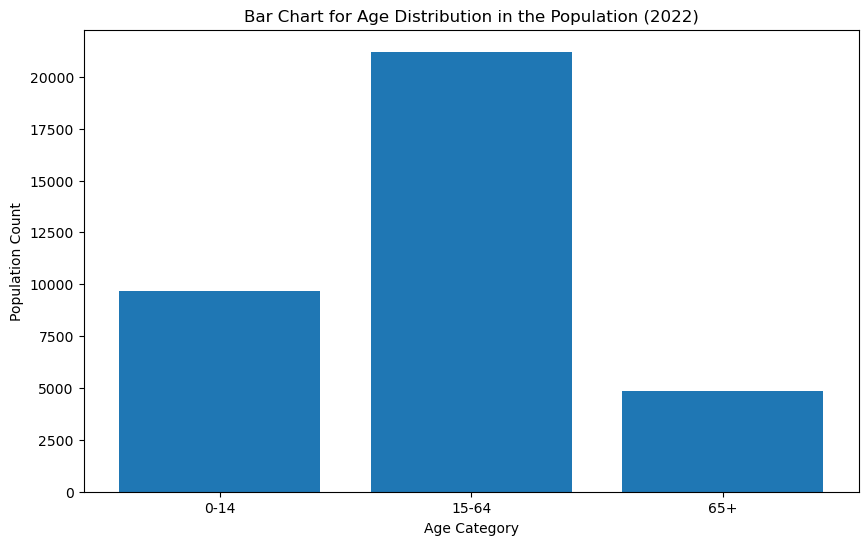

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel("2.1_Population_dynamics.xlsx")

# Convert columns to numeric data types and handle missing values (replace with median age)
df['Column5'] = pd.to_numeric(df['Column5'], errors='coerce')
df['Column6'] = pd.to_numeric(df['Column6'], errors='coerce')
df['Column7'] = pd.to_numeric(df['Column7'], errors='coerce')

# Replace missing age values with the median age of the population
median_age_column5 = df['Column5'].median()
median_age_column6 = df['Column6'].median()
median_age_column7 = df['Column7'].median()

df['Column5'].fillna(median_age_column5, inplace=True)
df['Column6'].fillna(median_age_column6, inplace=True)
df['Column7'].fillna(median_age_column7, inplace=True)

# Define age categories
age_categories = ['0-14', '15-64', '65+']

# Create a new DataFrame with columns for each age category
df_stacked = df[['Column5', 'Column6', 'Column7']].copy()
df_stacked.columns = age_categories

# Calculate the sum of each age category
total_population = df_stacked.sum()

# Create a bar chart for age distribution
plt.figure(figsize=(10, 6))
plt.bar(age_categories, total_population)
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Bar Chart for Age Distribution in the Population (2022)')
plt.show()
